In [2]:
import pandas as pd
import numpy as np
import folium
from folium.plugins import MarkerCluster

In [3]:
df = pd.read_csv('./data/gangnam_starbuks.csv')
df.head()


,Unnamed: 0,Latitude,Longitude
0,0,37.500880,127.022626
1,1,37.497070,127.024239
2,2,37.501786,127.032084
3,3,37.507038,127.031262
4,4,37.496495,127.027475


In [ ]:
df.info()
df.describe()
df.isna().sum()

In [4]:
df = df.drop("Unnamed: 0",axis=1)
df.head()

,Latitude,Longitude
0,37.500880,127.022626
1,37.497070,127.024239
2,37.501786,127.032084
3,37.507038,127.031262
4,37.496495,127.027475


In [5]:
center_lat = df["Latitude"].mean()
center_lon = df["Longitude"].mean()

In [6]:
gangnam_map = folium.Map(location = [center_lat,center_lon],zoom_start=13)

In [82]:
cluster = MarkerCluster().add_to(gangnam_map)

for _,row in df.iterrows():
    folium.CircleMarker(
        location = [row["Latitude"],row["Longitude"]],
        radius=3,
        fill=True,
        fill_opacity=0.8
    ).add_to(cluster)
    
    # print(location)
    # print("-"*30)

In [83]:
gangnam_map

In [76]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=5,random_state=3333)
kmeans_model.fit(df.iloc[:,0:2])

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",5
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",3333
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [75]:
print(df.iloc[:,0:2])

      Latitude   Longitude
0    37.500880  127.022626
1    37.497070  127.024239
2    37.501786  127.032084
3    37.507038  127.031262
4    37.496495  127.027475
..         ...         ...
995  37.484810  127.108791
996  37.485588  127.101114
997  37.498591  127.095127
998  37.491326  127.100159
999  37.485332  127.096086

[1000 rows x 2 columns]


In [77]:
kmeans_model.labels_

df["cluster"] = kmeans_model.labels_

df.head(20)

,Latitude,Longitude,cluster
0,37.500880,127.022626,2
1,37.497070,127.024239,2
2,37.501786,127.032084,2
3,37.507038,127.031262,2
4,37.496495,127.027475,2
5,37.496495,127.028304,2
6,37.507375,127.035266,2
7,37.502505,127.024051,2
8,37.495083,127.030883,2
9,37.501155,127.026387,2


In [78]:
#test_cluster = [[37.496495,127.027475]]
test_cluster = [
    {
       "Latitude":37.496495,
        "Longitude" :127.027475 
    }
]
test_cluster[0]["Latitude"]

37.496495

In [53]:
test_cluster[0]["Latitude"]

37.496495

In [79]:

pred = kmeans_model.predict([[test_cluster[0]["Latitude"],test_cluster[0]["Longitude"]]])
pred



c:\potenup3\prj_learn\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

In [80]:
kmeans_model.cluster_centers_

array([[ 37.5276094 , 127.03795598],
       [ 37.48994554, 127.05460982],
       [ 37.49779446, 127.02723942],
       [ 37.48705583, 127.10190646],
       [ 37.51166628, 127.05985764]])

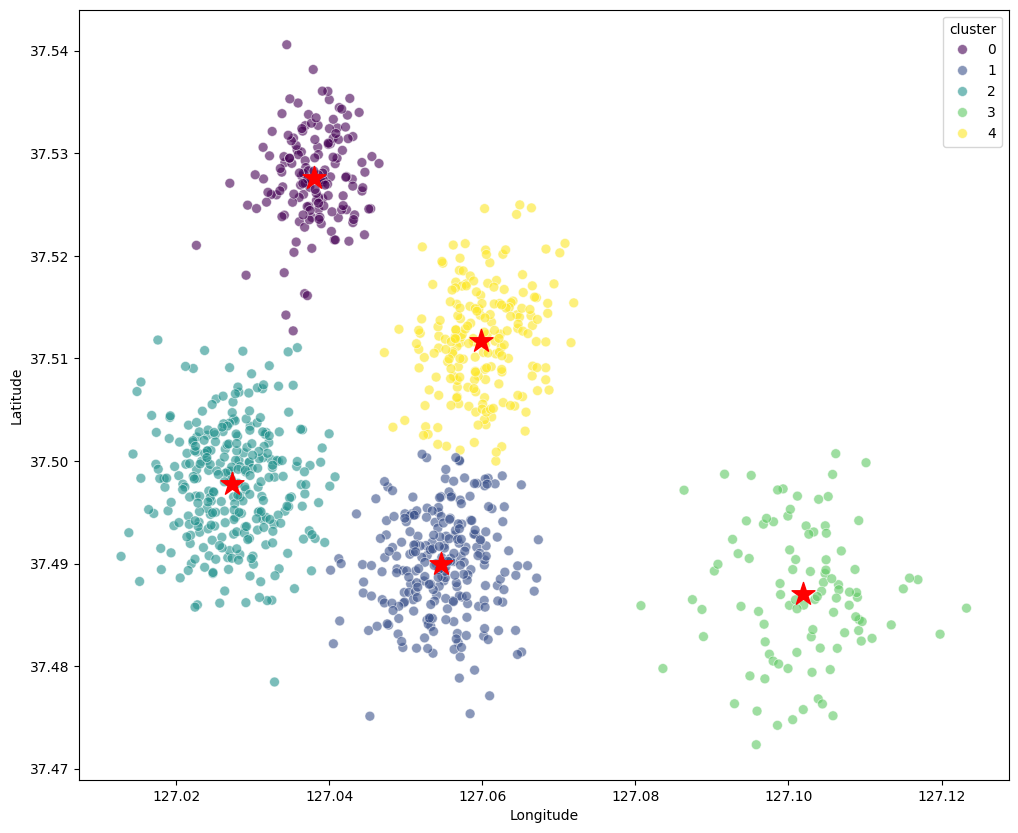

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))

sns.scatterplot(x='Longitude',y='Latitude',hue='cluster',data=df,palette='viridis',s=50,alpha=0.6,legend='full')
plt.scatter(kmeans_model.cluster_centers_[:,1],kmeans_model.cluster_centers_[:,0],s=300,c='red',marker='*')
plt.show()